1. В данных мне нужно в song_info: url_name, title, primary_artist, release_date, views, tags
2. В artist_info мне нужна популярность: url_name, followers
3. Мне нужно добавить в словарь song_info элемент release_year
4. В lyrics.jl я буду смотреть тексты, там два элемента - song, lyrics, нужно почитстить от "\n"

In [26]:
import jsonlines
from pprint import pprint
from collections import defaultdict, Counter

In [15]:
with jsonlines.open('song_info.json', 'r') as jsonl_f:
     song_info = [obj for obj in jsonl_f]

In [41]:
for song in song_info:
    year = song["release_date"]
    if year is not None:
        year = year[-4:]
    song["release_year"] = year

In [25]:
with jsonlines.open('artist_info.json', 'r') as jsonl_f:
     artist_info = [obj for obj in jsonl_f]

In [29]:
counter_artists = Counter()
for artist in artist_info:
    counter_artists[artist["url_name"]] += artist["followers"]
print(counter_artists.most_common(10))

[('Kendrick-lamar', 23782), ('Eminem', 21607), ('ewokABdevito', 20718), ('Drake', 13203), ('streetlights', 12914), ('Kanye-west', 10418), ('A-ap-rocky', 9313), ('J-cole', 9185), ('Xxxtentacion', 8858), ('Chance-the-rapper', 8761)]


In [52]:
counter_years = Counter()
for song in song_info:
    counter_years[song["release_year"]] += 1

In [43]:
import matplotlib.pyplot as plt

In [79]:
X = list(range(1960, 2022))
Y = []

for i in range(1960, 2022):
    for year in counter_years:
        if int(year) == i:
            Y.append(counter_years[year])

In [80]:
print(X)
print(Y)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[1, 2, 25, 75, 102, 94, 113, 146, 158, 219, 211, 257, 185, 213, 155, 181, 240, 246, 225, 153, 197, 132, 148, 209, 227, 218, 298, 327, 440, 471, 546, 630, 740, 951, 1150, 1160, 1264, 1382, 1759, 1851, 1942, 2170, 2212, 2544, 2765, 3209, 3724, 3880, 4283, 5361, 6236, 7787, 9426, 11276, 12785, 14901, 16656, 17457, 17773, 13044, 75, 3]


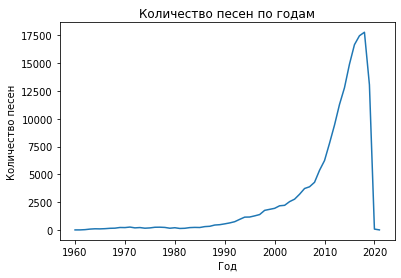

In [81]:
plt.plot(X, Y) # рисуем график - последовательно соединяем точки с координатами из X и Y
plt.title('Количество песен по годам') # заголовок
plt.ylabel('Количество песен') # подпись оси Х
plt.xlabel('Год') # подпись оси Y
plt.show()

In [84]:
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import wordpunct_tokenize
from wordcloud import WordCloud

morph = MorphAnalyzer()

In [96]:
def lemmatize(x):
    if type(x) != str:
        return ""
    text = wordpunct_tokenize(x)
    result = []
    for word in text:
        if word.isalpha():
            if len(word) > 2:
                nf = morph.parse(word)[0].normal_form
                result.append(nf)
    return " ".join(result)

In [97]:
text_titles = ''
for song in song_info:
    l = lemmatize(song["title"])
    text_titles += l
print(text_titles[:100])

swimming pools drankmoney treesxxxfuckin problemsdnapoetic justicebitch don kill vibeking kuntacontr


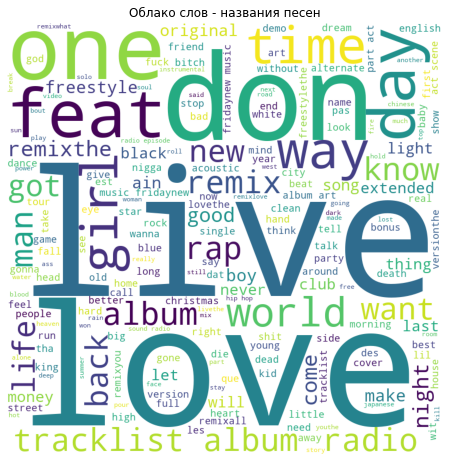

In [98]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(text_titles)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов - названия песен')
plt.show()

In [117]:
tags_counter = Counter()
for song in song_info:
    for tag in song["tags"]:
        tags_counter[tag] += 1

Топ-3 популярных жанра:  
'Rap': 142074  
'Pop': 48896  
'Rock': 25797

In [101]:
rap_text = ''
for song in song_info:
    if 'Rap' in song["tags"]:
        l = lemmatize(song["title"])
        rap_text += l

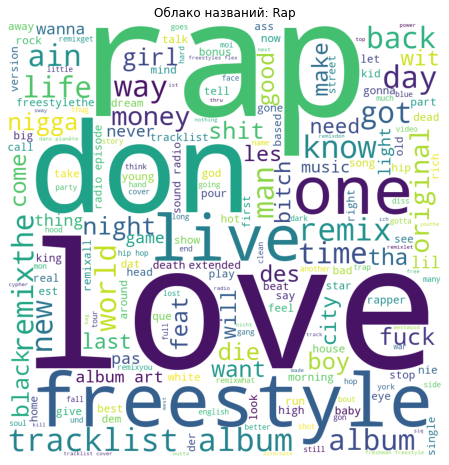

In [103]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(rap_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако названий: Rap')
plt.show()

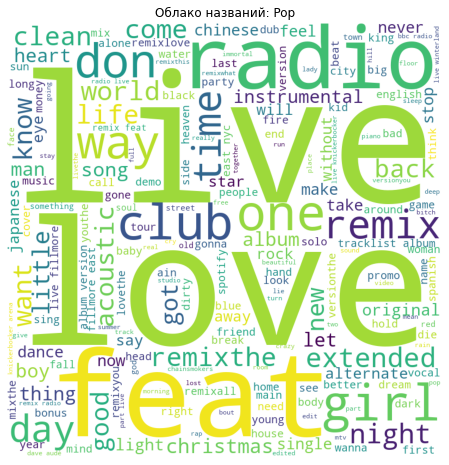

In [104]:
pop_text = ''
for song in song_info:
    if 'Pop' in song["tags"]:
        l = lemmatize(song["title"])
        pop_text += l

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(pop_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако названий: Pop')
plt.show()

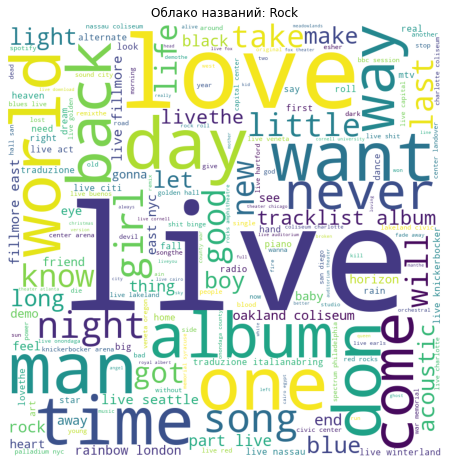

In [105]:
rock_text = ''
for song in song_info:
    if 'Rock' in song["tags"]:
        l = lemmatize(song["title"])
        rock_text += l

wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(rock_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако названий: Rock')
plt.show()

In [109]:
tags_views_counter = Counter()
for song in song_info:
    if song["views"] is not None:
        for tag in song["tags"]:
            tags_views_counter[tag] += int(song["views"])

Топ-3 прослушиваемых жанра:  
'Rap': 4265702259  
'Pop': 1520751709  
'R&B': 1093845940

In [111]:
with jsonlines.open('lyrics.jl', 'r') as jsonl_f:
     lyrics = [obj for obj in jsonl_f]

In [126]:
rock_textl = ''
for song in song_info:
    if 'Rock' in song["tags"]:
        s = song["url_name"]
        for el in lyrics:
            if el["song"] == s:
                l = el["lyrics"]
                lemm = lemmatize(l)
                rock_textl += lemm

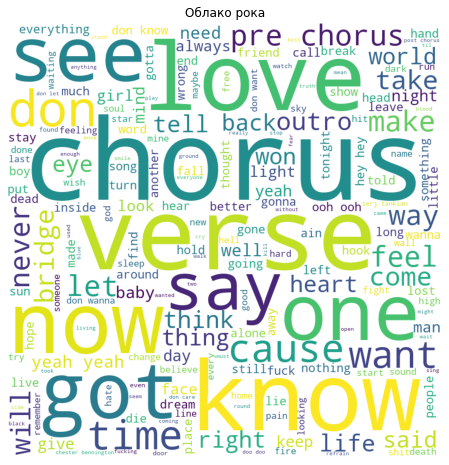

In [127]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(rock_textl)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако рока')
plt.show()

In [128]:
hard_rock_textl = ''
for song in song_info:
    if 'Hard Rock' in song["tags"]:
        s = song["url_name"]
        for el in lyrics:
            if el["song"] == s:
                l = el["lyrics"]
                lemm = lemmatize(l)
                hard_rock_textl += lemm

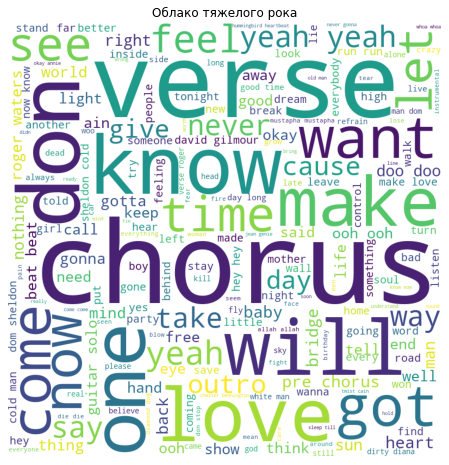

In [129]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(hard_rock_textl)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако тяжелого рока')
plt.show()

In [130]:
alternative_textl = ''
for song in song_info:
    if 'Alternative' in song["tags"]:
        s = song["url_name"]
        for el in lyrics:
            if el["song"] == s:
                l = el["lyrics"]
                lemm = lemmatize(l)
                alternative_textl += lemm

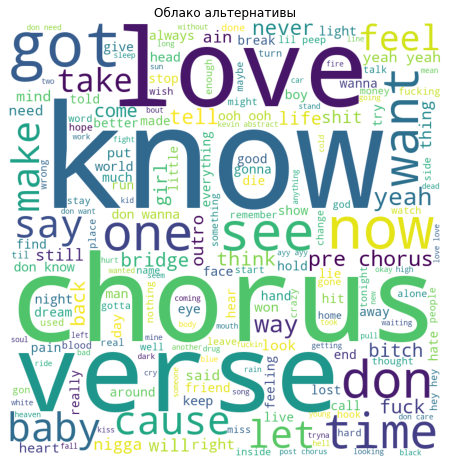

In [131]:
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800, 
).generate(alternative_textl)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако альтернативы')
plt.show()

1. топ-10 артистов с наибольшим количеством фоловеров
2. распределение песен по годам
3. топ-3 популярных жанра vs топ-3 прослушиваемых жанра
4. облако слов названий всех песен
5. облако названий рэп-поп-рок
6. облако текстов рока-альтернативы
7. эмоции от песен Эминема

In [132]:
d = {'Eminem-killshot-lyrics': {'Happy': 0.12, 'Angry': 0.15, 'Surprise': 0.23, 'Sad': 0.25, 'Fear': 0.25}, 'Eminem-rap-god-lyrics': {'Happy': 0.11, 'Angry': 0.07, 'Surprise': 0.33, 'Sad': 0.26, 'Fear': 0.24}, 'Eminem-lose-yourself-lyrics': {'Happy': 0.1, 'Angry': 0.05, 'Surprise': 0.28, 'Sad': 0.27, 'Fear': 0.29}, 'Eminem-the-monster-lyrics': {'Happy': 0.14, 'Angry': 0.02, 'Surprise': 0.36, 'Sad': 0.11, 'Fear': 0.37}, 'Eminem-kamikaze-lyrics': {'Happy': 0.05, 'Angry': 0.07, 'Surprise': 0.37, 'Sad': 0.23, 'Fear': 0.28}, 'Eminem-without-me-lyrics': {'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.35, 'Sad': 0.23, 'Fear': 0.25}, 'Eminem-bad-guy-lyrics': {'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.29, 'Sad': 0.28, 'Fear': 0.25}, 'Eminem-the-real-slim-shady-lyrics': {'Happy': 0.09, 'Angry': 0.04, 'Surprise': 0.14, 'Sad': 0.41, 'Fear': 0.32}, 'Eminem-love-the-way-you-lie-lyrics': {'Happy': 0.16, 'Angry': 0.07, 'Surprise': 0.22, 'Sad': 0.27, 'Fear': 0.28}, 'Eminem-no-love-lyrics': {'Happy': 0.27, 'Angry': 0.13, 'Surprise': 0.2, 'Sad': 0.19, 'Fear': 0.22}, 'Eminem-headlights-lyrics': {'Happy': 0.13, 'Angry': 0.06, 'Surprise': 0.28, 'Sad': 0.27, 'Fear': 0.26}, 'Eminem-not-afraid-lyrics': {'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.28, 'Sad': 0.22, 'Fear': 0.35}, 'Eminem-greatest-lyrics': {'Happy': 0.13, 'Angry': 0.13, 'Surprise': 0.35, 'Sad': 0.18, 'Fear': 0.22}, 'Eminem-beautiful-lyrics': {'Happy': 0.16, 'Angry': 0.11, 'Surprise': 0.2, 'Sad': 0.24, 'Fear': 0.28}, 'Eminem-when-im-gone-lyrics': {'Happy': 0.15, 'Angry': 0.06, 'Surprise': 0.21, 'Sad': 0.29, 'Fear': 0.29}, 'Eminem-cleanin-out-my-closet-lyrics': {'Happy': 0.05, 'Angry': 0.03, 'Surprise': 0.28, 'Sad': 0.44, 'Fear': 0.2}, 'Eminem-my-name-is-lyrics': {'Happy': 0.12, 'Angry': 0.12, 'Surprise': 0.32, 'Sad': 0.15, 'Fear': 0.29}, 'Eminem-space-bound-lyrics': {'Happy': 0.13, 'Angry': 0.05, 'Surprise': 0.2, 'Sad': 0.34, 'Fear': 0.28}, 'Eminem-guts-over-fear-lyrics': {'Happy': 0.1, 'Angry': 0.09, 'Surprise': 0.19, 'Sad': 0.37, 'Fear': 0.25}, 'Eminem-like-toy-soldiers-lyrics': {'Happy': 0.11, 'Angry': 0.1, 'Surprise': 0.22, 'Sad': 0.3, 'Fear': 0.27}, 'Eminem-the-way-i-am-lyrics': {'Happy': 0.15, 'Angry': 0.02, 'Surprise': 0.3, 'Sad': 0.23, 'Fear': 0.31}, 'Eminem-superman-lyrics': {'Happy': 0.2, 'Angry': 0.03, 'Surprise': 0.31, 'Sad': 0.29, 'Fear': 0.17}, 'Eminem-sing-for-the-moment-lyrics': {'Happy': 0.15, 'Angry': 0.11, 'Surprise': 0.28, 'Sad': 0.3, 'Fear': 0.17}, 'Eminem-detroit-vs-everybody-lyrics': {'Happy': 0.1, 'Angry': 0.11, 'Surprise': 0.26, 'Sad': 0.3, 'Fear': 0.23}, 'Eminem-untouchable-lyrics': {'Happy': 0.11, 'Angry': 0.05, 'Surprise': 0.27, 'Sad': 0.22, 'Fear': 0.35}, 'Eminem-so-much-better-lyrics': {'Happy': 0.08, 'Angry': 0.03, 'Surprise': 0.35, 'Sad': 0.26, 'Fear': 0.28}, 'Eminem-marshall-mathers-lyrics': {'Happy': 0.14, 'Angry': 0.1, 'Surprise': 0.21, 'Sad': 0.32, 'Fear': 0.24}, 'Eminem-stepping-stone-lyrics': {'Happy': 0.06, 'Angry': 0.1, 'Surprise': 0.24, 'Sad': 0.29, 'Fear': 0.31}, 'Eminem-criminal-lyrics': {'Happy': 0.07, 'Angry': 0.13, 'Surprise': 0.33, 'Sad': 0.3, 'Fear': 0.17}, 'Eminem-chloraseptic-remix-lyrics': {'Happy': 0.09, 'Angry': 0.06, 'Surprise': 0.26, 'Sad': 0.27, 'Fear': 0.32}, 'Eminem-kings-never-die-lyrics': {'Happy': 0.09, 'Angry': 0.1, 'Surprise': 0.32, 'Sad': 0.2, 'Fear': 0.29}, 'Eminem-im-back-lyrics': {'Happy': 0.11, 'Angry': 0.08, 'Surprise': 0.35, 'Sad': 0.16, 'Fear': 0.3}, 'Eminem-asshole-lyrics': {'Happy': 0.13, 'Angry': 0.08, 'Surprise': 0.34, 'Sad': 0.25, 'Fear': 0.21}, 'Eminem-just-dont-give-a-fuck-lyrics': {'Happy': 0.2, 'Angry': 0.1, 'Surprise': 0.16, 'Sad': 0.27, 'Fear': 0.27}, 'Eminem-phenomenal-lyrics': {'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.36, 'Sad': 0.22, 'Fear': 0.27}, 'Eminem-infinite-lyrics': {'Happy': 0.06, 'Angry': 0.05, 'Surprise': 0.28, 'Sad': 0.22, 'Fear': 0.39}, 'Eminem-white-america-lyrics': {'Happy': 0.21, 'Angry': 0.09, 'Surprise': 0.18, 'Sad': 0.11, 'Fear': 0.42}, 'Eminem-good-guy-lyrics': {'Happy': 0.22, 'Angry': 0.05, 'Surprise': 0.15, 'Sad': 0.25, 'Fear': 0.33}, 'Eminem-normal-lyrics': {'Happy': 0.07, 'Angry': 0.08, 'Surprise': 0.32, 'Sad': 0.26, 'Fear': 0.26}, 'Eminem-bet-shady-20-cypher-lyrics': {'Happy': 0.09, 'Angry': 0.1, 'Surprise': 0.21, 'Sad': 0.32, 'Fear': 0.29}, 'Eminem-brainless-lyrics': {'Happy': 0.13, 'Angry': 0.09, 'Surprise': 0.26, 'Sad': 0.2, 'Fear': 0.33}, 'Eminem-and-jessie-reyez-nice-guy-lyrics': {'Happy': 0.17, 'Angry': 0.13, 'Surprise': 0.2, 'Sad': 0.27, 'Fear': 0.23}, 'Eminem-fack-lyrics': {'Happy': 0.27, 'Angry': 0.01, 'Surprise': 0.39, 'Sad': 0.16, 'Fear': 0.17}, 'Eminem-framed-lyrics': {'Happy': 0.07, 'Angry': 0.07, 'Surprise': 0.24, 'Sad': 0.3, 'Fear': 0.32}, 'Eminem-hailies-song-lyrics': {'Happy': 0.16, 'Angry': 0.02, 'Surprise': 0.27, 'Sad': 0.26, 'Fear': 0.29}, 'Eminem-arose-lyrics': {'Happy': 0.11, 'Angry': 0.06, 'Surprise': 0.26, 'Sad': 0.33, 'Fear': 0.23}, 'Eminem-ass-like-that-lyrics': {'Happy': 0.23, 'Angry': 0.12, 'Surprise': 0.2, 'Sad': 0.33, 'Fear': 0.12}, 'Eminem-cold-wind-blows-lyrics': {'Happy': 0.14, 'Angry': 0.09, 'Surprise': 0.39, 'Sad': 0.22, 'Fear': 0.16}, 'Eminem-just-lose-it-lyrics': {'Happy': 0.06, 'Angry': 0.02, 'Surprise': 0.35, 'Sad': 0.33, 'Fear': 0.25}, 'Eminem-bad-husband-lyrics': {'Happy': 0.23, 'Angry': 0.09, 'Surprise': 0.26, 'Sad': 0.26, 'Fear': 0.16}}

In [140]:
Happy = 0
Angry = 0
Surprise = 0
Sad = 0
Fear = 0
n = 0

for el in d:
    n += 1
    Happy += d[el]['Happy']
    Angry += d[el]['Angry']
    Surprise += d[el]['Surprise']
    Sad += d[el]['Sad']
    Fear += d[el]['Fear']

Happy = Happy / n
Angry = Angry / n
Surprise = Surprise / n
Sad = Sad / n
Fear = Fear / n

print(Happy, Angry, Surprise, Sad, Fear)

0.1272 0.0762 0.272 0.26 0.2656


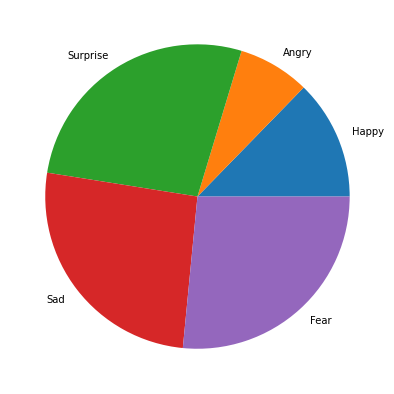

In [144]:
# Creating dataset
emotions = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
data = [0.1272, 0.0762, 0.272, 0.26, 0.2656]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = emotions)
 
# show plot
plt.show()